In [1]:
import torch

if torch.cuda.is_available():
    print("GPU is available.")
else:
    print("No GPU found. Switching to CPU.")


GPU is available.


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\AAKASH/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-1-15 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
img='https://ultralytics.com/images/zidane.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 3514.0ms pre-process, 246.7ms inference, 69.9ms NMS per image at shape (1, 3, 384, 640)


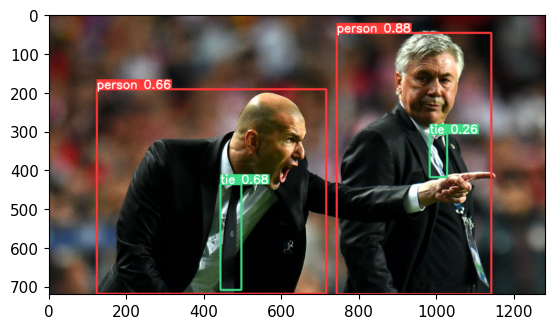

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [11]:
img1='http://cdn.shopify.com/s/files/1/0670/8717/articles/shutterstock_211943116_1200x1200.jpg?v=1472662829'

In [12]:
results1 = model(img1)
results1.print()

image 1/1: 667x1000 14 persons, 9 bicycles, 5 cars, 1 motorcycle, 3 buss
Speed: 639.4ms pre-process, 203.4ms inference, 6.4ms NMS per image at shape (1, 3, 448, 640)


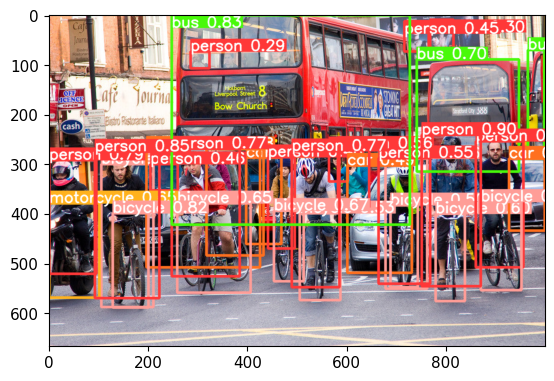

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results1.render()))
plt.show()

In [14]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [15]:
import uuid   # Unique identifier for each img
import os
import time

In [16]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['happy','sad','surprise','anger','fear','neutral','disgust']
number_imgs = 7

In [21]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [17]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))


data\images\happy.c3b05278-b494-11ee-b8e1-ac74b1565404.jpg


In [18]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\happy.c7e0f965-b494-11ee-aafd-ac74b1565404.jpg
data\images\happy.c7e0f966-b494-11ee-bb3e-ac74b1565404.jpg
data\images\happy.c7e0f967-b494-11ee-a8b3-ac74b1565404.jpg
data\images\happy.c7e0f968-b494-11ee-85c6-ac74b1565404.jpg
data\images\happy.c7e0f969-b494-11ee-9026-ac74b1565404.jpg
data\images\happy.c7e0f96a-b494-11ee-a8cc-ac74b1565404.jpg
data\images\happy.c7e0f96b-b494-11ee-8e29-ac74b1565404.jpg
data\images\sad.c7e0f96c-b494-11ee-ac75-ac74b1565404.jpg
data\images\sad.c7e0f96d-b494-11ee-88c0-ac74b1565404.jpg
data\images\sad.c7e0f96e-b494-11ee-b3ed-ac74b1565404.jpg
data\images\sad.c7e0f96f-b494-11ee-a051-ac74b1565404.jpg
data\images\sad.c7e0f970-b494-11ee-a70e-ac74b1565404.jpg
data\images\sad.c7e0f971-b494-11ee-a542-ac74b1565404.jpg
data\images\sad.c7e0f972-b494-11ee-8dbc-ac74b1565404.jpg
data\images\surprise.c7e0f973-b494-11ee-b625-ac74b1565404.jpg
data\images\surprise.c7e0f974-b494-11ee-a6dc-ac74b1565404.jpg
data\images\surprise.c7e0f975-b494-11ee-a162-ac74b1565404.jpg
da

In [19]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [20]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [21]:
import sys
sys.executable


'C:\\Users\\AAKASH\\.conda\\envs\\gpu_env\\python.exe'

In [22]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
From https://github.com/ultralytics/yolov5
   7d9a117..703d37e  master     -> origin/master
 + 40f3124...4831329 dependabot/pip/tensorflow-lte-2.15.0.post1 -> origin/dependabot/pip/tensorflow-lte-2.15.0.post1  (forced update)
github:  YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ult

In [24]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\AAKASH/.cache\torch\hub\master.zip
YOLOv5  2024-1-16 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7069459 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [30]:
img = os.path.join('data', 'images', 'anger.f3a36f3e-b420-11ee-8521-ac74b1565404.jpg')

In [31]:
results = model(img)

In [32]:
results.print()

image 1/1: 480x640 1 anger
Speed: 20.7ms pre-process, 27.6ms inference, 66.2ms NMS per image at shape (1, 3, 480, 640)


In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [35]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()